# Time Series - Moving Average Example (Electricity Consumption)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initialize a Dataframe 'df' with some dummy values
# Dummy values are in the  csv file, the string in the read_csv() represents where our csv file is located
# you can change the string path in the read_csv() to import the csv file from different folder

df = pd.read_csv('Electricity_Consumption.csv', index_col=0,
     parse_dates=True, infer_datetime_format=True)

df.head()

,Electricity_Consumed
Month,
2005-01-01,448.1
2005-02-01,437.4
2005-03-01,480.0
2005-04-01,533.9
2005-05-01,535.3


In [3]:
print(df.dtypes)

Electricity_Consumed    float64
dtype: object


In [4]:
# get first row
first_date = df.index[0]
first_date

Timestamp('2005-01-01 00:00:00')

In [4]:
df.Electricity_Consumed.head()

Month
2005-01-01    448.1
2005-02-01    437.4
2005-03-01    480.0
2005-04-01    533.9
2005-05-01    535.3
Name: Electricity_Consumed, dtype: float64

# Visualize

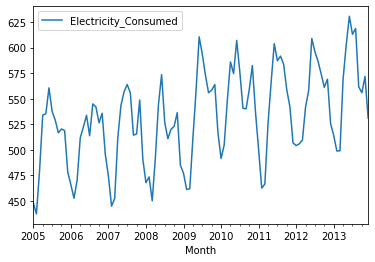

In [5]:
df.plot()

# Average of Recent Period
Perform some analysis of the data 

In [7]:
RECENT_PERIOD = 3  # set the recent period
df.Electricity_Consumed[-RECENT_PERIOD:]

Month
2013-10-01    555.8
2013-11-01    571.7
2013-12-01    531.0
Name: Electricity_Consumed, dtype: float64

In [8]:
df_recent_period = df[-RECENT_PERIOD:] 

In [9]:
df_recent_period.head()

,Electricity_Consumed
Month,
2013-10-01,555.8
2013-11-01,571.7
2013-12-01,531.0


In [10]:
# average value of recent period
df_recent_period.Electricity_Consumed.mean()  

552.8333333333334

In [11]:
# total value of recent period
df_recent_period.Electricity_Consumed.sum()

1658.5

# Moving Average
Moving Average (or rolling aveage) is used to analyze data points by creating a series of averages of different subsets of the full data set.  A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.  The estimate of the trend-cycle at time t is obtained by averaging values of the time series within k periods of t.

In [12]:
# compute moving (or rolling) average of past 3 moths of data
print(df.Electricity_Consumed.head())
print(df.Electricity_Consumed.rolling(window=3).mean().head())

Month
2005-01-01    448.1
2005-02-01    437.4
2005-03-01    480.0
2005-04-01    533.9
2005-05-01    535.3
Name: Electricity_Consumed, dtype: float64
Month
2005-01-01           NaN
2005-02-01           NaN
2005-03-01    455.166667
2005-04-01    483.766667
2005-05-01    516.400000
Name: Electricity_Consumed, dtype: float64


In [19]:
rolling_mean_3 = df.Electricity_Consumed.rolling(window=3).mean().shift(1)  # moving average of past 3 months, shift one row
rolling_mean_12 = df.Electricity_Consumed.rolling(window=12).mean().shift(1) # moving average of past 12 months, shift one row
print(df.Electricity_Consumed.head())
print("--  rolling mean 3")
print(rolling_mean_3.head())
print("--  rolling mean 12")
print(rolling_mean_12.head())

Month
2005-01-01    448.1
2005-02-01    437.4
2005-03-01    480.0
2005-04-01    533.9
2005-05-01    535.3
Name: Electricity_Consumed, dtype: float64
--  rolling mean 3
Month
2005-01-01           NaN
2005-02-01           NaN
2005-03-01           NaN
2005-04-01    455.166667
2005-05-01    483.766667
Name: Electricity_Consumed, dtype: float64
--  rolling mean 12
Month
2005-01-01   NaN
2005-02-01   NaN
2005-03-01   NaN
2005-04-01   NaN
2005-05-01   NaN
Name: Electricity_Consumed, dtype: float64


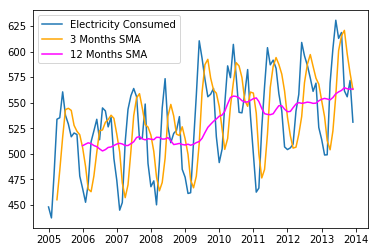

In [20]:
# plot the graphs with different moving average
plt.plot(df.index, df.Electricity_Consumed, label='Electricity Consumed')
plt.plot(df.index, rolling_mean_3, label='3 Months SMA', color='orange')
plt.plot(df.index, rolling_mean_12, label='12 Months SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

To know more about the concepts on Time Series: https://otexts.org/fpp2/intro.html

        

# Mean Squre Error

In [22]:
from sklearn.metrics import mean_squared_error 

In [24]:
# ignore the first fews rows with no moving average data 
mean_squared_error(df.Electricity_Consumed[3:], rolling_mean_3[3:])

1723.8247936507937

In [25]:
mean_squared_error(df.Electricity_Consumed[12:], rolling_mean_12[12:])

1578.3040516493063

In [26]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values) 
  
# calculated values 
Y_pred = [0.6,1.29,1.99,2.69,3.4]  # Y_pred = Y' 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(Y_true,Y_pred) 

0.21606